In [1]:
!git clone https://github.com/huggingface/transformers.git

Cloning into 'transformers'...
remote: Enumerating objects: 136846, done.
remote: Counting objects: 100% (650/650), done.
remote: Compressing objects: 100% (328/328), done.
remote: Total 136846 (delta 386), reused 482 (delta 282), pack-reused 136196
Receiving objects: 100% (136846/136846), 136.30 MiB | 18.25 MiB/s, done.
Resolving deltas: 100% (102490/102490), done.


In [2]:
%cd /content/transformers/examples/pytorch/question-answering

/content/transformers/examples/pytorch/question-answering


In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 21.0 MB/s eta 0:00:00


In [4]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.5 MB/s eta 0:00:00


## Copy train.json and test.json to `question-answering` directory !!!

In [5]:
import json
import pandas as pd

In [6]:
import os
import random
import numpy as np
import torch

def set_all_seeds(seed):
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = True

set_all_seeds(42)

In [68]:
train = pd.read_json("train.json")
test = pd.read_json("test.json")

In [69]:
train

,id,text,label,extracted_part
0,809436509,Извещение о проведении открытого конкурса в эл...,обеспечение исполнения контракта,{'text': ['Размер обеспечения исполнения контр...
1,854885310,ТРЕБОВАНИЯ К СОДЕРЖАНИЮ ЗАЯВКИ участника запро...,обеспечение исполнения контракта,{'text': ['Поставщик должен предоставить обесп...
2,4382157,Извещение о проведении электронного аукциона д...,обеспечение исполнения контракта,{'text': ['Размер обеспечения исполнения контр...
3,184555082,Извещение о проведении электронного аукциона д...,обеспечение исполнения контракта,{'text': ['Размер обеспечения исполнения контр...
4,211645258,Извещение о проведении электронного аукциона д...,обеспечение исполнения контракта,{'text': ['Размер обеспечения исполнения контр...
...,...,...,...,...
1794,938335285,"«УТВЕРЖДАЮ» Директор МУП ""ПКП и ОРТ"" _________...",обеспечение гарантийных обязательств,{'text': ['Заказчиком установлено требование о...
1795,214609521,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯ...,обеспечение гарантийных обязательств,"{'text': [''], 'answer_start': [0], 'answer_en..."
1796,94811748,ДОГОВОР ПОДРЯДА № _____ «___»___________20____...,обеспечение гарантийных обязательств,"{'text': [''], 'answer_start': [0], 'answer_en..."
1797,903507299,ДОКУМЕНТАЦИЯ О ЗАКУПКЕ ЗАПРОС ПРЕДЛОЖЕНИЙ В ЭЛ...,обеспечение гарантийных обязательств,"{'text': [''], 'answer_start': [0], 'answer_en..."


In [70]:
test

,id,text,label
0,762883279,МУНИЦИПАЛЬНЫЙ КОНТРАКТ № ______ на оказание ус...,обеспечение исполнения контракта
1,311837655,Извещение о проведении электронного аукциона д...,обеспечение исполнения контракта
2,540954893,Идентификационный код закупки: 222633005300163...,обеспечение исполнения контракта
3,274660397,Идентификационный код закупки: 222631202689463...,обеспечение исполнения контракта
4,732742591,Идентификационный код закупки: 222637800031163...,обеспечение исполнения контракта
...,...,...,...
313,854936033,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯ...,обеспечение гарантийных обязательств
314,576390745,Часть III Проект договора Договор №______ пост...,обеспечение гарантийных обязательств
315,323745820,УТВЕРЖДАЮ Председатель единой комиссии по осущ...,обеспечение гарантийных обязательств
316,712286194,Версия с 04.07.2022 года У Т В Е Р Ж Д А Ю «Го...,обеспечение гарантийных обязательств


Convert dataset to SQuAD format

In [71]:
lst_all = []

In [72]:
for i in range(len(train)):
    el = train.iloc[i]
    extr = el['extracted_part']
    if extr['text'][0] == '':
        new_elem = {"id": str(el['id']), 'title': "empty", 'context': el['text'],  'question': el['label'], 'answers': {'text': [], 'answer_start': []}}
    else:
        new_elem = {"id": str(el['id']), 'title': "empty", 'context': el['text'],  'question': el['label'], 'answers': {'text': [extr['text'][0]], 'answer_start': [extr['answer_start'][0]]}}
    lst_all.append(new_elem)

In [73]:
train_all = pd.DataFrame(lst_all)

In [74]:
train_all

,id,title,context,question,answers
0,809436509,empty,Извещение о проведении открытого конкурса в эл...,обеспечение исполнения контракта,{'text': ['Размер обеспечения исполнения контр...
1,854885310,empty,ТРЕБОВАНИЯ К СОДЕРЖАНИЮ ЗАЯВКИ участника запро...,обеспечение исполнения контракта,{'text': ['Поставщик должен предоставить обесп...
2,4382157,empty,Извещение о проведении электронного аукциона д...,обеспечение исполнения контракта,{'text': ['Размер обеспечения исполнения контр...
3,184555082,empty,Извещение о проведении электронного аукциона д...,обеспечение исполнения контракта,{'text': ['Размер обеспечения исполнения контр...
4,211645258,empty,Извещение о проведении электронного аукциона д...,обеспечение исполнения контракта,{'text': ['Размер обеспечения исполнения контр...
...,...,...,...,...,...
1794,938335285,empty,"«УТВЕРЖДАЮ» Директор МУП ""ПКП и ОРТ"" _________...",обеспечение гарантийных обязательств,{'text': ['Заказчиком установлено требование о...
1795,214609521,empty,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯ...,обеспечение гарантийных обязательств,"{'text': [], 'answer_start': []}"
1796,94811748,empty,ДОГОВОР ПОДРЯДА № _____ «___»___________20____...,обеспечение гарантийных обязательств,"{'text': [], 'answer_start': []}"
1797,903507299,empty,ДОКУМЕНТАЦИЯ О ЗАКУПКЕ ЗАПРОС ПРЕДЛОЖЕНИЙ В ЭЛ...,обеспечение гарантийных обязательств,"{'text': [], 'answer_start': []}"


In [75]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1799 non-null   object
 1   title     1799 non-null   object
 2   context   1799 non-null   object
 3   question  1799 non-null   object
 4   answers   1799 non-null   object
dtypes: object(5)
memory usage: 70.4+ KB


In [76]:
lst_test = []

In [77]:
for i in range(len(test)):
    el = test.iloc[i]
    new_elem = {"id": str(el['id']), 'title': "empty", 'context': el['text'],  'question': el['label'], 'answers': {'text': [], 'answer_start': []}}
    lst_test.append(new_elem)

In [78]:
test_all = pd.DataFrame(lst_test)

In [79]:
test_all

,id,title,context,question,answers
0,762883279,empty,МУНИЦИПАЛЬНЫЙ КОНТРАКТ № ______ на оказание ус...,обеспечение исполнения контракта,"{'text': [], 'answer_start': []}"
1,311837655,empty,Извещение о проведении электронного аукциона д...,обеспечение исполнения контракта,"{'text': [], 'answer_start': []}"
2,540954893,empty,Идентификационный код закупки: 222633005300163...,обеспечение исполнения контракта,"{'text': [], 'answer_start': []}"
3,274660397,empty,Идентификационный код закупки: 222631202689463...,обеспечение исполнения контракта,"{'text': [], 'answer_start': []}"
4,732742591,empty,Идентификационный код закупки: 222637800031163...,обеспечение исполнения контракта,"{'text': [], 'answer_start': []}"
...,...,...,...,...,...
313,854936033,empty,ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯ...,обеспечение гарантийных обязательств,"{'text': [], 'answer_start': []}"
314,576390745,empty,Часть III Проект договора Договор №______ пост...,обеспечение гарантийных обязательств,"{'text': [], 'answer_start': []}"
315,323745820,empty,УТВЕРЖДАЮ Председатель единой комиссии по осущ...,обеспечение гарантийных обязательств,"{'text': [], 'answer_start': []}"
316,712286194,empty,Версия с 04.07.2022 года У Т В Е Р Ж Д А Ю «Го...,обеспечение гарантийных обязательств,"{'text': [], 'answer_start': []}"


In [80]:
test_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        318 non-null    object
 1   title     318 non-null    object
 2   context   318 non-null    object
 3   question  318 non-null    object
 4   answers   318 non-null    object
dtypes: object(5)
memory usage: 12.5+ KB


In [25]:
!pip install git+https://github.com/huggingface/transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-q08qmm3h
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-q08qmm3h
  Resolved https://github.com/huggingface/transformers to commit 3d3204c025b6b5de013e07dd364208e28b4d9589
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 24.9 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.29.0.dev0-py3-none-any.whl size=6989000 sha256=89a639f1c875834b40a89863c5850ff56462a80464cee7a9d84e3c66c19d2d29
  Stored in directory: /tmp/pip-ephem-wheel-cache-_yipn7al/wheels/14/a0/7b/8f6b25ba4110aa215fcb8d6aedd6cd4f9b9b6619190999ac2b
Successfully built transformers


In [81]:
from datasets import Dataset
data_train = Dataset.from_pandas(train_all)
data_test = Dataset.from_pandas(test_all)

In [83]:
ds = data_train.train_test_split(test_size=0.1)

In [84]:
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 1619
    })
    test: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 180
    })
})

In [85]:
data_train = ds['train']
data_validation = ds['test']

In [86]:
data_train

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 1619
})

In [87]:
data_validation

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 180
})

In [88]:
data_test

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 318
})

In [89]:
data_train.to_json("data_train.json.py")

Creating json from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

19671242

In [90]:
data_validation.to_json("data_validation.json.py")

Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

2147232

In [91]:
data_test.to_json("data_test.json.py")

Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

3711448

In [37]:
!mkdir datasets

In [92]:
!mv data_train.json.py datasets/data_train.json.py
!mv data_validation.json.py datasets/data_validation.json.py
!mv data_test.json.py datasets/data_test.json.py

In [108]:
!python run_qa.py \
  --model_name_or_path "cointegrated/rubert-tiny2" \
  --dataset_name "/content/transformers/examples/pytorch/question-answering/datasets" \
  --do_train \
  --do_eval \
  --do_predict \
  --per_device_train_batch_size 16 \
  --max_answer_length 50 \
  --learning_rate 3e-5 \
  --num_train_epochs 30 \
  --version_2_with_negative \
  --max_seq_length 384 \
  --doc_stride 128 \
  --output_dir "/content/transformers/examples/pytorch/question-answering/rubert-tiny2-finetuned-kntr4"

2023-04-24 06:32:15.991408: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
04/24/2023 06:32:18 - WARNING - __main__ - Process rank: 0, device: cuda:0, n_gpu: 1distributed training: True, 16-bits training: False
04/24/2023 06:32:18 - INFO - __main__ - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=True,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': F

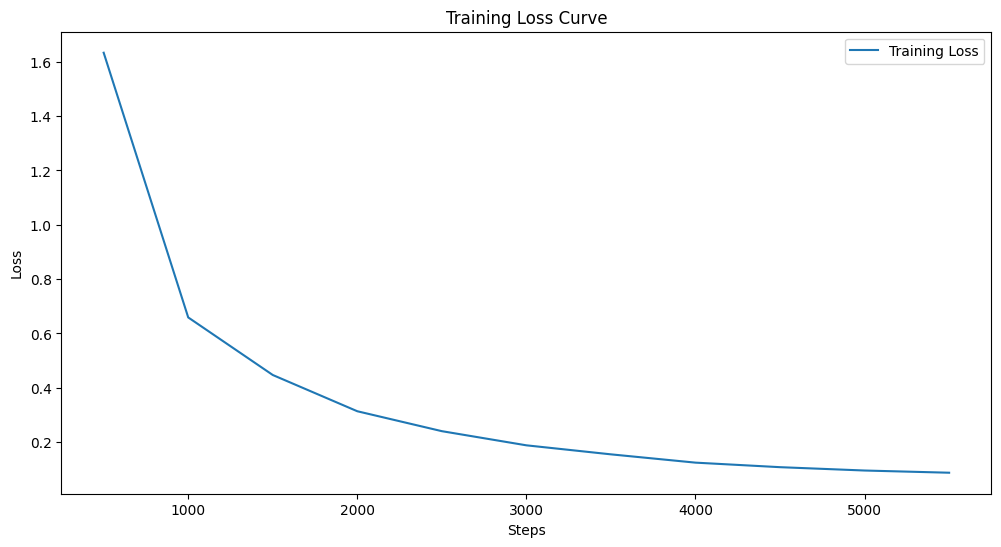

In [109]:
import matplotlib.pyplot as plt

def plot_loss_from_trainer_state(file_name):
    with open(file_name, 'r') as file:
        trainer_state = json.load(file)
    
    train_loss = trainer_state['log_history']
    losses = [entry['loss'] for entry in train_loss if 'loss' in entry]
    steps = [entry['step'] for entry in train_loss if 'loss' in entry]

    plt.figure(figsize=(12, 6))
    plt.plot(steps, losses, label="Training Loss")
    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.title("Training Loss Curve")
    plt.legend()
    plt.show()

plot_loss_from_trainer_state('/content/transformers/examples/pytorch/question-answering/rubert-tiny2-finetuned-kntr4/trainer_state.json')

In [110]:
with open("/content/transformers/examples/pytorch/question-answering/rubert-tiny2-finetuned-kntr4/eval_results.json", "r") as read_file:
    eval_results = json.load(read_file)
    print(eval_results['eval_f1'])

92.87519126121839


In [111]:
with open("/content/transformers/examples/pytorch/question-answering/rubert-tiny2-finetuned-kntr4/predict_predictions.json", "r") as read_file:
    data = json.load(read_file)
print(data)

{'762883279': 'Размер обеспечения исполнения Контракта составляет _______ рублей ____ копеек (5 процентов от цены контракта).', '311837655': 'Размер обеспечения исполнения контракта 10.00%', '540954893': 'Размер обеспечение исполнения контракта устанавливается от 0,5 % до 30 % начальной (максимальной) цены контракта', '274660397': 'Размер обеспечение исполнения контракта устанавливается от 0,5 % до 30 % начальной (максимальной) цены контракта', '732742591': 'Размер обеспечение исполнения контракта устанавливается от 0,5 % до 30 % начальной (максимальной) цены контракта', '102997495': 'Размер обеспечение исполнения контракта устанавливается от 0,5 % до 30 % начальной (максимальной) цены контракта', '355078344': 'Размер обеспечение исполнения контракта устанавливается от 0,5 % до 30 % начальной (максимальной) цены контракта', '803828087': 'Размер обеспечения исполнения контракта 10557.05 Российский рубль', '285525147': 'Размер обеспечения исполнения контракта 106489.11 Российский рубль',

In [112]:
def get_indexes(search_string, substring):
    start_idx = search_string.index(substring)
    return (start_idx, start_idx + len(substring))

In [114]:
prediction_lst = []

In [115]:
for i, el in enumerate(data.items()):
    test_item = test.iloc[i]
    ans_text = data[str(test_item['id'])]
    if ans_text == "":
        new_pred_elem = {'id': int(test_item['id']), 'text': test_item['text'], 'label': test_item['label'], 'extracted_part': {'text': [ans_text], 'answer_start': [0], 'answer_end': [0]}}
        prediction_lst.append(new_pred_elem)
    else:
        ans_start, ans_end = get_indexes(test_item['text'], ans_text)
        new_pred_elem = {'id': int(test_item['id']), 'text': test_item['text'], 'label': test_item['label'], 'extracted_part': {'text': [ans_text], 'answer_start': [ans_start], 'answer_end': [ans_end]}}
        prediction_lst.append(new_pred_elem)

In [116]:
prediction_lst

[{'id': 762883279,
  'text': 'МУНИЦИПАЛЬНЫЙ КОНТРАКТ № ______ на оказание услуг по техническому обслуживанию и ремонту принтеров и многофункциональных устройств, заправке и восстановлению картриджей (идентификационный код закупки 223861800296886010100100590019511244) г. Ханты-Мансийск «___» ____________ 2022 г.  (или) возмещения убытков причинённых Исполнителем убытков. 6. Обеспечение исполнения контракта 6.1. Исполнение контракта обеспечиваются предоставлением независимой гарантии, выданной банком и соответствующей требованиям Федерального закона от 05.04.2013 № 44-ФЗ «О контрактной системе в сфере закупок товаров, работ, услуг для обеспечения государственных и муниципальных нужд», или внесением денежных средств на указанный заказчиком счет, на котором в соответствии с законодательством Российской Федерации учитываются операции со средствами, поступающими заказчику. Способ обеспечения исполнения контракта, срок действия независимой гарантии определяются в соответствии с требованиями Ф

In [117]:
with open('predictions.json', 'w', encoding="utf-8") as fout:
    json.dump(prediction_lst , fout, ensure_ascii=False, indent=4)